#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [ ]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [ ]:
shape = (4,3)
X=torch.rand(shape)
Y=torch.rand(shape)
###행으로 병합 코드
row_cat = torch.cat([X,Y], dim=1)
###열로 병합 코드
col_cat = torch.cat([X,Y], dim=0)

In [ ]:
print(row_cat)
print(col_cat)

tensor([[0.4533, 0.3915, 0.9301, 0.5427, 0.7268, 0.4674],
        [0.1657, 0.2141, 0.8973, 0.0785, 0.5550, 0.7257],
        [0.4353, 0.9773, 0.3359, 0.6661, 0.9174, 0.2004],
        [0.3270, 0.1363, 0.6716, 0.0681, 0.7009, 0.5418]])
tensor([[0.4533, 0.3915, 0.9301],
        [0.1657, 0.2141, 0.8973],
        [0.4353, 0.9773, 0.3359],
        [0.3270, 0.1363, 0.6716],
        [0.5427, 0.7268, 0.4674],
        [0.0785, 0.5550, 0.7257],
        [0.6661, 0.9174, 0.2004],
        [0.0681, 0.7009, 0.5418]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [ ]:
!pip install d2l

In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [ ]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.0022, -1.2179]) 
label: tensor([7.3101])


In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.3778, -1.3286],
        [ 1.3146, -1.7048],
        [-0.2556,  0.0786],
        [-0.1659, -0.2951],
        [-0.6279,  0.8722],
        [ 1.9909,  1.0110],
        [-0.4545,  0.0048],
        [ 0.2769, -1.3354],
        [-0.0717, -0.2466],
        [ 0.2961,  0.6995],
        [ 0.4755, -0.8243],
        [-0.9352,  0.8403],
        [ 1.4800, -1.8012],
        [-1.5480, -0.1080],
        [-1.0653, -0.3800],
        [ 1.0551,  1.2169],
        [ 0.5048,  1.0107],
        [ 0.2003, -1.2166],
        [ 0.7143, -0.3922],
        [ 2.1083,  0.3337]]) 
 tensor([[ 8.6121],
        [11.9921],
        [ 4.6254],
        [ 5.4440],
        [ 2.3124],
        [ 9.9622],
        [ 4.1232],
        [ 8.3434],
        [ 5.6708],
        [ 5.3569],
        [ 8.1450],
        [ 1.4632],
        [12.6371],
        [ 1.0209],
        [ 2.8670],
        [ 6.8375],
        [ 5.5052],
        [ 7.9371],
        [ 8.2357],
        [11.3209]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([5.5])  #b=5.5로 고정시킴 

In [ ]:
print(w)
print(b)

tensor([[-0.0093],
        [ 0.0093]], requires_grad=True)
tensor([5.5000])


In [ ]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w)+b

In [ ]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [ ]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
      for param in params:
        param -= lr*param.grad/batch_size
        param.grad.zero_()

In [ ]:
lr = 0.001
num_epochs = 50
net = linreg
loss = squared_loss

w_list = []
b_list = []
mse_list = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
      l = loss(net(X,w,b),y)
      # Compute gradient on `l` with respect to [`w`, `b`]
      l.sum().backward()
      sgd([w], lr, batch_size)    # b는 update 안함
    with torch.no_grad():
      train_l = loss(net(features, w, b), labels)
      print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
      w_l = w.tolist()
      w_list.append(w_l)
      b_float = b.item()
      b_list.append(b_float)
      mse_list.append(train_l.mean())

epoch 1, loss 4.674706
epoch 2, loss 3.819412
epoch 3, loss 3.120617
epoch 4, loss 2.549672
epoch 5, loss 2.083184
epoch 6, loss 1.702048
epoch 7, loss 1.390649
epoch 8, loss 1.136225
epoch 9, loss 0.928352
epoch 10, loss 0.758510
epoch 11, loss 0.619742
epoch 12, loss 0.506364
epoch 13, loss 0.413729
epoch 14, loss 0.338045
epoch 15, loss 0.276206
epoch 16, loss 0.225682
epoch 17, loss 0.184402
epoch 18, loss 0.150674
epoch 19, loss 0.123117
epoch 20, loss 0.100602
epoch 21, loss 0.082206
epoch 22, loss 0.067175
epoch 23, loss 0.054895
epoch 24, loss 0.044861
epoch 25, loss 0.036663
epoch 26, loss 0.029965
epoch 27, loss 0.024492
epoch 28, loss 0.020020
epoch 29, loss 0.016366
epoch 30, loss 0.013381
epoch 31, loss 0.010942
epoch 32, loss 0.008950
epoch 33, loss 0.007322
epoch 34, loss 0.005991
epoch 35, loss 0.004905
epoch 36, loss 0.004016
epoch 37, loss 0.003291
epoch 38, loss 0.002698
epoch 39, loss 0.002214
epoch 40, loss 0.001818
epoch 41, loss 0.001495
epoch 42, loss 0.001230
e

In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0193, -0.0102], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.])


+cost graph 그리기 (x축 w, y축 loss)

In [ ]:
! pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


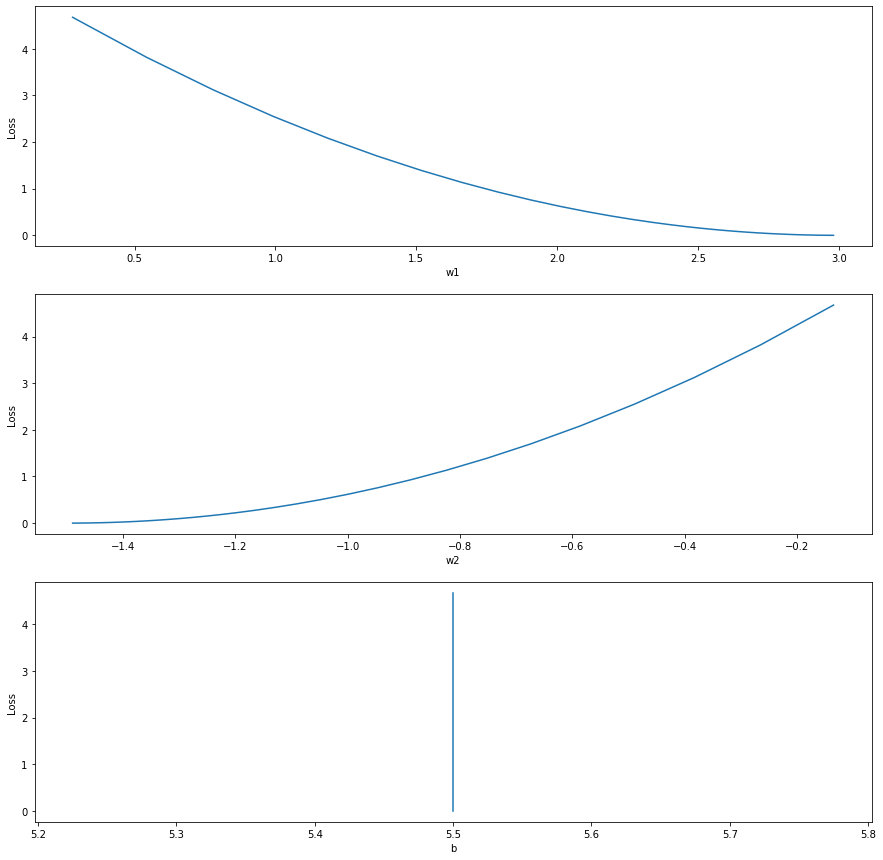

In [ ]:
import matplotlib.pyplot as plt
w1_list = []
w2_list = []
for w in range(len(w_list)):
  w1_list.append(w_list[w][0])
  w2_list.append(w_list[w][1])

fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot(3,1,1)
ax1.plot(w1_list, mse_list)
ax1.set_ylabel('Loss')
ax1.set_xlabel('w1')

ax2 = plt.subplot(3,1,2)
ax2.plot(w2_list, mse_list)
ax2.set_ylabel('Loss')
ax2.set_xlabel('w2')

ax1 = plt.subplot(3,1,3)
ax1.plot(b_list, mse_list)
ax1.set_ylabel('Loss')
ax1.set_xlabel('b')

plt.show()

concise implementation of linear regression 
- api 사용해보기

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [ ]:
next(iter(data_iter))

[tensor([[-1.1141,  0.7104],
         [-1.1643, -0.8815],
         [-0.0953,  0.5954],
         [-0.8669,  1.0016],
         [ 1.0241, -0.2837],
         [ 0.5334,  0.2873],
         [ 0.9749, -0.2134],
         [ 0.0547, -0.3006],
         [ 1.0773, -1.1815],
         [-2.7643,  0.1579],
         [-1.6331,  0.4953],
         [ 1.3111,  0.4872],
         [-0.4372, -0.2991],
         [-0.3675, -0.8059],
         [ 0.4798,  0.9166],
         [-1.0653, -1.6791],
         [ 0.5648, -0.2354],
         [-1.2880, -0.1417],
         [ 1.7486,  0.2001],
         [ 0.1645, -0.9975]]), tensor([[ 1.0843],
         [ 3.3204],
         [ 4.3369],
         [ 1.3939],
         [ 9.0084],
         [ 6.6381],
         [ 8.7542],
         [ 6.1186],
         [10.5151],
         [-3.0412],
         [-0.1440],
         [ 8.7139],
         [ 4.6452],
         [ 5.6106],
         [ 5.5493],
         [ 4.8156],
         [ 7.5513],
         [ 1.8470],
         [10.4633],
         [ 7.4789]])]

In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [ ]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [ ]:
loss = nn.MSELoss()

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.05)

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000103
epoch 2, loss 0.000104
epoch 3, loss 0.000104


In [ ]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0009, -0.0005])
error in estimating b: tensor([-0.0003])
